# City Weather with OpenWeatherAPI
## Generate City Data

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from scipy.stats import linregress
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

583

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | malartic
Processing Record 8 of Set 1 | berbera
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | orangeburg
Processing Record 11 of Set 1 | saint-orens-de-gameville
Processing Record 12 of Set 1 | gat
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | valparaiso
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | fairbanks
Processing Record 22 of Set 1 | palabuhanratu
City not found. Skipping.

Processing Record 39 of Set 4 | meulaboh
Processing Record 40 of Set 4 | ibipeba
Processing Record 41 of Set 4 | biak
Processing Record 42 of Set 4 | leh
Processing Record 43 of Set 4 | dargaville
Processing Record 44 of Set 4 | caibarien
Processing Record 45 of Set 4 | itarema
Processing Record 46 of Set 4 | mujiayingzi
Processing Record 47 of Set 4 | touros
Processing Record 48 of Set 4 | haines junction
Processing Record 49 of Set 4 | dhidhdhoo
Processing Record 50 of Set 4 | gondar
Processing Record 1 of Set 5 | maxixe
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | bredasdorp
Processing Record 4 of Set 5 | tuatapere
Processing Record 5 of Set 5 | carbonia
Processing Record 6 of Set 5 | pisco
Processing Record 7 of Set 5 | lichinga
Processing Record 8 of Set 5 | cabo san lucas
Processing Record 9 of Set 5 | fuengirola
Processing Record 10 of Set 5 | beloha
Processing Record 11 of Set 5 | takoradi
Processing Record 12 of Set 5 | ayia varvara
Processing Record 13 

Processing Record 35 of Set 8 | kalmunai
Processing Record 36 of Set 8 | siteki
Processing Record 37 of Set 8 | saint-paul
Processing Record 38 of Set 8 | inta
Processing Record 39 of Set 8 | penzance
Processing Record 40 of Set 8 | muroto
Processing Record 41 of Set 8 | ichchapuram
Processing Record 42 of Set 8 | kitob
Processing Record 43 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 44 of Set 8 | zhezkazgan
Processing Record 45 of Set 8 | besikduzu
Processing Record 46 of Set 8 | voloshka
Processing Record 47 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 48 of Set 8 | tilichiki
Processing Record 49 of Set 8 | faranah
Processing Record 50 of Set 8 | saint-leu
Processing Record 1 of Set 9 | baoning
Processing Record 2 of Set 9 | karaul
City not found. Skipping...
Processing Record 3 of Set 9 | senanga
Processing Record 4 of Set 9 | naze
Processing Record 5 of Set 9 | puerto escondido
Processing Record 6 of Set 9 | mogadi

Processing Record 7 of Set 12 | fairlie
Processing Record 8 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 9 of Set 12 | macae
Processing Record 10 of Set 12 | nsoko
Processing Record 11 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 12 of Set 12 | urucui
Processing Record 13 of Set 12 | izhevskoye
Processing Record 14 of Set 12 | belmonte
Processing Record 15 of Set 12 | monrovia
Processing Record 16 of Set 12 | san policarpo
Processing Record 17 of Set 12 | richards bay
Processing Record 18 of Set 12 | iquique
Processing Record 19 of Set 12 | panacan
Processing Record 20 of Set 12 | gornopravdinsk
Processing Record 21 of Set 12 | thinadhoo
Processing Record 22 of Set 12 | pizhma
Processing Record 23 of Set 12 | birin
Processing Record 24 of Set 12 | vavuniya
Processing Record 25 of Set 12 | acajutla
Processing Record 26 of Set 12 | deputatskiy
Processing Record 27 of Set 12 | kushima
Processing Record 28 of Set 12 | moron
Processing Record

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.6391,-120.4579,70.84,59,75,4.61,US,2022-12-22 22:31:20
1,Thompson,55.7435,-97.8558,-7.44,71,75,11.50,CA,2022-12-22 22:33:21
2,Barrow,71.2906,-156.7887,14.02,85,100,21.85,US,2022-12-22 22:33:22
3,Tasiilaq,65.6145,-37.6368,15.96,68,2,6.24,GL,2022-12-22 22:33:23
4,Albany,42.6001,-73.9662,34.59,89,100,3.00,US,2022-12-22 22:30:31
5,Jamestown,42.0970,-79.2353,40.59,75,100,6.91,US,2022-12-22 22:29:08
6,Malartic,48.1335,-78.1328,21.31,91,100,10.47,CA,2022-12-22 22:30:24
7,Berbera,10.4396,45.0143,74.66,84,29,5.35,SO,2022-12-22 22:30:17
8,Mar Del Plata,-38.0023,-57.5575,74.82,88,81,32.99,AR,2022-12-22 22:33:32
9,Orangeburg,33.4918,-80.8557,46.94,92,85,4.00,US,2022-12-22 22:33:32


In [8]:
# Reorder the columns
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lompoc,US,2022-12-22 22:31:20,34.6391,-120.4579,70.84,59,75,4.61
1,Thompson,CA,2022-12-22 22:33:21,55.7435,-97.8558,-7.44,71,75,11.50
2,Barrow,US,2022-12-22 22:33:22,71.2906,-156.7887,14.02,85,100,21.85
3,Tasiilaq,GL,2022-12-22 22:33:23,65.6145,-37.6368,15.96,68,2,6.24
4,Albany,US,2022-12-22 22:30:31,42.6001,-73.9662,34.59,89,100,3.00
5,Jamestown,US,2022-12-22 22:29:08,42.0970,-79.2353,40.59,75,100,6.91
6,Malartic,CA,2022-12-22 22:30:24,48.1335,-78.1328,21.31,91,100,10.47
7,Berbera,SO,2022-12-22 22:30:17,10.4396,45.0143,74.66,84,29,5.35
8,Mar Del Plata,AR,2022-12-22 22:33:32,-38.0023,-57.5575,74.82,88,81,32.99
9,Orangeburg,US,2022-12-22 22:33:32,33.4918,-80.8557,46.94,92,85,4.00


In [10]:
# Create the output file (CSV).
output_data_file = "resources/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Scatter Plots

In [11]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Latitude vs Max Temp

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

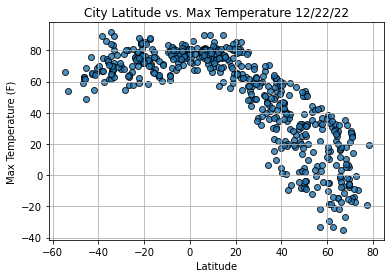

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("resources/Fig1.png")

# Show plot.
plt.show()

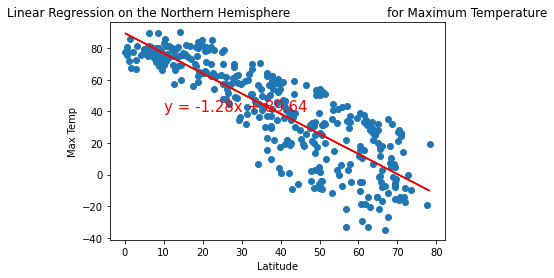

r-value: -0.8563236984262694


In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
print(f"r-value: {linregress(x_values, y_values)[2]}")

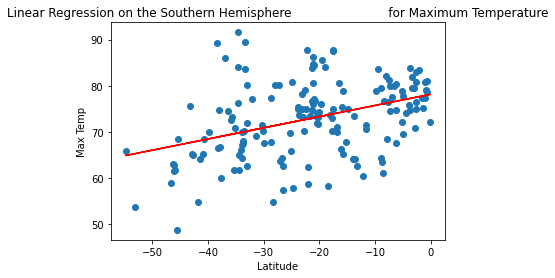

r-value: 0.39463963544893255


In [17]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,40))
print(f"r-value: {linregress(x_values, y_values)[2]}")

### Latitude vs Humidity

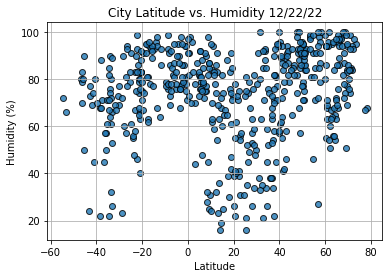

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("resources/Fig2.png")
# Show plot.
plt.show()

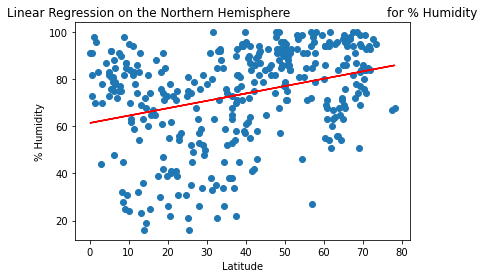

r-value: 0.31846176542013555


In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))
print(f"r-value: {linregress(x_values, y_values)[2]}")

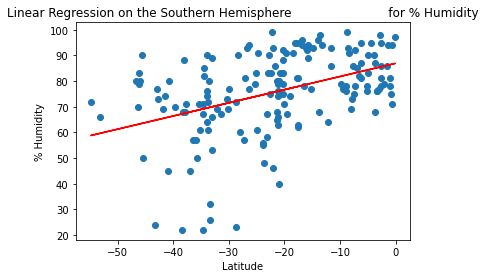

r-value: 0.4249325956809702


In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))
print(f"r-value: {linregress(x_values, y_values)[2]}")

### Latitude vs Cloudiness

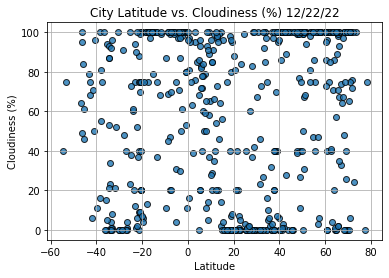

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("resources/Fig3.png")
# Show plot.
plt.show()

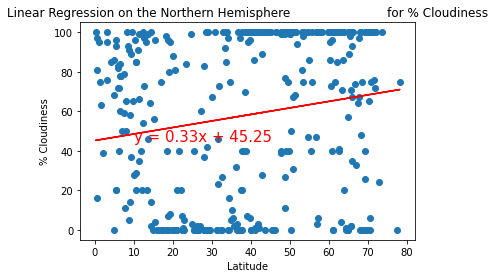

r-value: 0.16972688731468066


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,45))
print(f"r-value: {linregress(x_values, y_values)[2]}")

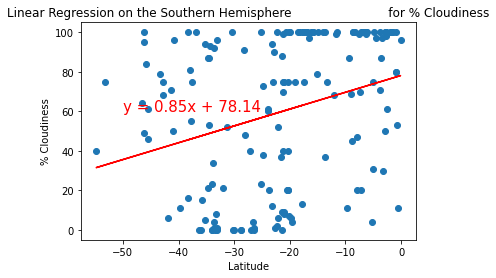

r-value: 0.296274372034166


In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
print(f"r-value: {linregress(x_values, y_values)[2]}")

### Latitude vs Wind Speed

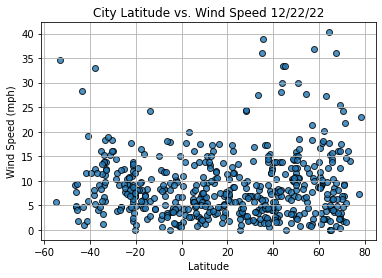

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("resources/Fig4.png")
# Show plot.
plt.show()

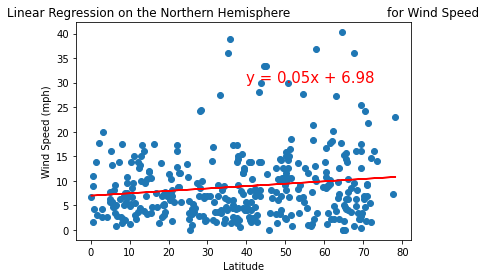

r-value: 0.14697561995474145


In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,30))
print(f"r-value: {linregress(x_values, y_values)[2]}")

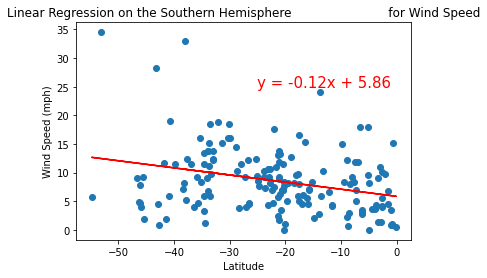

r-value: -0.29083155894256013


In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-25,25))
print(f"r-value: {linregress(x_values, y_values)[2]}")